In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import time

In [44]:
data_path = 'Fish_Dataset'
batch_size = 32
num_epochs = 10
learning_rate = 0.001
val_split = 0.2

In [45]:
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(data_path, transform=data_transforms)
dataset_size = len(dataset)
val_size = int(dataset_size * val_split)
train_size = dataset_size - val_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [46]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

dataloaders = {'train': train_loader, 'val': val_loader}
dataset_sizes = {'train': train_size, 'val': val_size}
class_names = dataset.classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Загрузка предобученной модели ResNet18 из torchvision
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

model = model.to(device)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [47]:
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    # Каждая эпоха состоит из обучения и валидации
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        # Проход по данным
        for batch_idx, (inputs, labels) in enumerate(dataloaders[phase]):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            # Информация о прогрессе каждые 10 батчей
            if batch_idx % 10 == 0:
                print(f'{phase} Epoch: {epoch + 1}/{num_epochs} [{batch_idx * len(inputs)}/{dataset_sizes[phase]}] '
                      f'Loss: {loss.item():.4f}')

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print()

# Оценка модели
model.eval()
running_corrects = 0

Epoch 1/10
----------
train Epoch: 1/10 [0/14400] Loss: 0.0000
train Epoch: 1/10 [320/14400] Loss: 0.0000
train Epoch: 1/10 [640/14400] Loss: 0.0000
train Epoch: 1/10 [960/14400] Loss: 0.0000
train Epoch: 1/10 [1280/14400] Loss: 0.0000
train Epoch: 1/10 [1600/14400] Loss: 0.0000
train Epoch: 1/10 [1920/14400] Loss: 0.0000
train Epoch: 1/10 [2240/14400] Loss: 0.0000
train Epoch: 1/10 [2560/14400] Loss: 0.0000
train Epoch: 1/10 [2880/14400] Loss: 0.0000
train Epoch: 1/10 [3200/14400] Loss: 0.0000
train Epoch: 1/10 [3520/14400] Loss: 0.0000
train Epoch: 1/10 [3840/14400] Loss: 0.0000
train Epoch: 1/10 [4160/14400] Loss: 0.0000
train Epoch: 1/10 [4480/14400] Loss: 0.0000
train Epoch: 1/10 [4800/14400] Loss: 0.0000
train Epoch: 1/10 [5120/14400] Loss: 0.0000
train Epoch: 1/10 [5440/14400] Loss: 0.0000
train Epoch: 1/10 [5760/14400] Loss: 0.0000
train Epoch: 1/10 [6080/14400] Loss: 0.0000
train Epoch: 1/10 [6400/14400] Loss: 0.0000
train Epoch: 1/10 [6720/14400] Loss: 0.0000
train Epoch: 1/1

In [64]:
for inputs, labels in val_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

val_acc = running_corrects.double() / len(val_loader.dataset)
print(f'Validation Accuracy: {val_acc:.4f}')

Validation Accuracy: 0.8372


ЗАДАЧА 3

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [77]:
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [78]:
data_path = 'Fish_Dataset'

dataset = datasets.ImageFolder(data_path, transform=data_transforms)
val_split = 0.2
dataset_size = len(dataset)
val_size = int(dataset_size * val_split)
train_size = dataset_size - val_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 32
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [79]:
model.eval()
running_corrects = 0

for inputs, labels in val_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

val_acc = running_corrects.double() / len(val_loader.dataset)
print(f'Validation Accuracy with Augmentation: {val_acc:.4f}')

Validation Accuracy with Augmentation: 1.0000


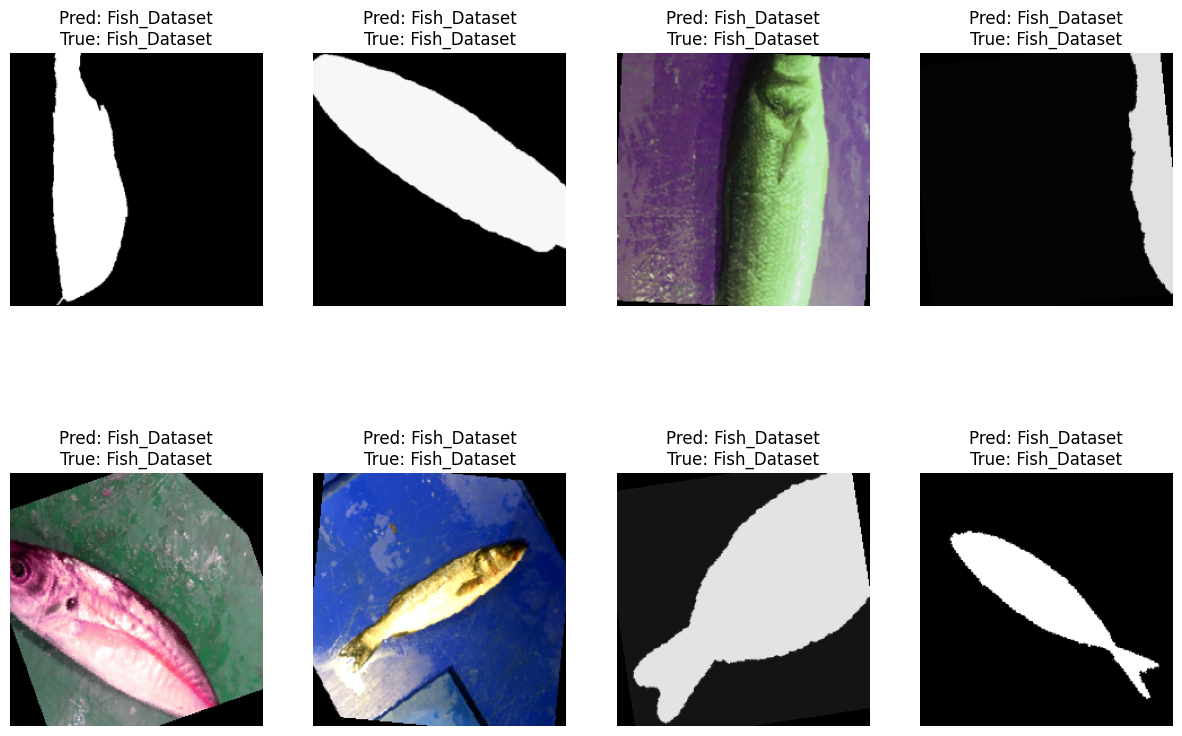

In [83]:
inputs, classes = next(iter(val_loader))
inputs = inputs.to(device)
classes = classes.to(device)
with torch.no_grad():
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

# Преобразование изображений для отображения
inputs = inputs.cpu().numpy().transpose((0, 2, 3, 1))
inputs = np.clip(inputs * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)

# Отображение изображений и предсказаний
plt.figure(figsize=(15, 10))
for i in range(min(batch_size, 8)):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(inputs[i])
    ax.set_title(f'Pred: {class_names[preds[i]]}\nTrue: {class_names[classes[i]]}')
    ax.axis('off')
plt.show()